In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import enchant

import sys
sys.path.append("..")
from settings import EMOJIVEC_DATA_PATH, DEMOGRAPHICS_PATH

pd.set_option('mode.chained_assignment', None)
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
emojis = pd.read_csv(EMOJIVEC_DATA_PATH, encoding='utf-8')
emojis.head(100)

,WorkerID,FormId,Duration,emoji_index,emoji,word
0,A19AAMLW7OP5V4,65,330.0,0,#️⃣,ash
1,A1DD23J1WBGQUU,65,315.0,0,#️⃣,hashtag
2,A2C7A6E70NYNUI,65,317.0,0,#️⃣,hashtag
3,A2CK0OXMPOR9LE,65,521.0,0,#️⃣,pound
4,A272X64FOZFYLB,65,329.0,0,#️⃣,pound
...,...,...,...,...,...,...
95,AXXA481XH6FKE,28,165.0,3,®️,r
96,A2G7DTL156PTKA,28,152.0,3,®️,r
97,A33DVD9ZMS0XXN,28,90.0,3,®️,r
98,A10VA2IF9D0HRI,28,169.0,3,®️,copyright


In [3]:
print(f"Number of emojis: {len(emojis.emoji.unique())}")
print(f"Number of emoji indices: {len(emojis.emoji_index.unique())}")

Number of emojis: 1325
Number of emoji indices: 1325


In [4]:
df = (emojis.groupby(["emoji_index", "WorkerID"]).count() > 1).emoji.reset_index()
df[df.emoji == True]

,emoji_index,WorkerID,emoji
195,6,A9A2IX3OBORBE,True
969,34,A143XRCI1YXAFE,True
1073,37,A9A2IX3OBORBE,True
1172,41,A1QAUU3AJI3D7K,True
1392,49,A1QAUU3AJI3D7K,True
...,...,...,...
36087,1267,A3TD4VJPN33IWZ,True
36178,1271,A143XRCI1YXAFE,True
36409,1279,A143XRCI1YXAFE,True
37334,1311,A3TD4VJPN33IWZ,True


In [5]:
emojis[(emojis.WorkerID == "A9A2IX3OBORBE") & (emojis.emoji_index == 6)]

,WorkerID,FormId,Duration,emoji_index,emoji,word
171,A9A2IX3OBORBE,94,760.0,6,™️,trademark
173,A9A2IX3OBORBE,94,530.0,6,™️,trademark


In [6]:
emojis[(emojis.WorkerID == "A143XRCI1YXAFE") & (emojis.emoji_index == 34)]

,WorkerID,FormId,Duration,emoji_index,emoji,word
971,A143XRCI1YXAFE,122,129.0,34,Ⓜ️,metro
973,A143XRCI1YXAFE,122,155.0,34,Ⓜ️,metro


In [7]:
vocabularies = emojis[["emoji","word"]]\
                    .groupby("emoji")\
                    .word.apply(list)\
                    .reset_index()\
                    .rename({"word": "vocabulary"}, axis=1)

In [8]:
full_vocab = [st for row in vocabularies.vocabulary for st in row]

max_words = 0
for word in full_vocab:
    num_words = len(word.split())
    if num_words > max_words:
        if num_words > 2:
            print(word)
        max_words = num_words
print("Maximum length of emoji description: ", max_words)

left or right
arrow bottom left corner
that clicking sounds you do when you want to sound cool
Maximum length of emoji description:  11


In [9]:
# Dictionary check
d = enchant.Dict("en_US")
for _, description in emojis.word.iteritems():
    splitted = description.split()
    for word in splitted:
        if not d.check(word) and not d.suggest(word):
            print(description)

redbeanonigiri
jappanesepostoffice
gaypriide
shhhhhh


In [10]:
# Manually spotted mistakes
# id k -> idk, om g -> omg, oh h -> ohh
emojis.word = emojis.word.replace({"oh h": "ohh", "om g": "omg", "id k": "idk", "hmm m": "hmmm"})
# ship a
emojis.word = emojis.word.replace({"ship a": "ship"})
# other cases that didn't pass dictionary check
emojis.word = emojis.word.replace({"jappanesepostoffice": "japanese post office"})
emojis.word = emojis.word.replace({"gaypriide": "gay pride"})
emojis.word = emojis.word.replace({"redbeanonigiri": "red bean onigiri"})

In [11]:
for description in emojis.word.unique():
    emoji = emojis[emojis.word == description].emoji.values[0]
    description = description.split()
    if len(description) == 2:
        if len(description[1]) == 1:
            print(description, emoji)

['circle', 'r'] ®️
['capital', 'r'] ®️
['mix', 'y'] ♍
['evil', 'm'] ♏
['green', 'x'] ❎
['pose', 'y'] 🌺
['bent', 'o'] 🍣
['chimp', 'y'] 🐵
['tad', 'a'] 👩‍🚀
['flu', 'k'] 🔌
['ta', 'j'] 🕌
['manor', 'a'] 🕎
['symbol', 'o'] 😐
['disappointed', 'd'] 😧
['whole', 'r'] 🛰️
['claim', 'p'] 🧗
['whip', 'e'] 🧻
['inner', 's'] 🩱


Some of these can still be fixed

In [12]:
emojis.word = emojis.word.replace({"bent o": "bento"})
emojis.word = emojis.word.replace({"manor a": "manora"})
emojis.word = emojis.word.replace({"ta j": "taj"})
emojis.word = emojis.word.replace({"disappointed d": "disappointed"})

In [13]:
# Spotted while embedding analysis -> 03
emojis.word = emojis.word.replace({"fastfoward": "fastforward"})
emojis.word = emojis.word.replace({"tolietpaper": "toilet paper"})
emojis.word = emojis.word.replace({"travelling": "traveling"})
emojis.word = emojis.word.replace({"ha ult": "hault"})
emojis.word = emojis.word.replace({"fleurdelis": "fleur de lis"})
emojis.word = emojis.word.replace({"hearingaid": "hearing aid"})
emojis.word = emojis.word.replace({"nowater": "no water"})
emojis.word = emojis.word.replace({"nonsmoking": "non smoking"})
emojis.word = emojis.word.replace({"fireextinguisher": "fire extinguisher"})

In [14]:
emojis[emojis.word == 'unknown']

,WorkerID,FormId,Duration,emoji_index,emoji,word
2097,ANMAPKRHPGWX1,102,194.0,73,♑,unknown
4825,A38E0LSBY662SJ,9,81.0,168,㊙️,unknown
5682,A1V2H0UF94ATWY,123,238.0,198,🈺,unknown
8244,A38E0LSBY662SJ,22,72.0,288,🍙,unknown
9681,AKQAI78JTXXC9,76,356.0,339,🎍,unknown
15623,A2U45Y0OV3P7D8,25,143.0,546,👤,unknown
15626,ARQR5NIFA1AJ,25,129.0,546,👤,unknown
15635,A2D2JX8R0QU9G4,25,188.0,546,👤,unknown
32044,A4LG89UTZF0AG,16,193.0,1120,🤷,unknown
32054,AKQAI78JTXXC9,16,595.0,1120,🤷,unknown


In [15]:
emojis[emojis.word == 'no idea']

,WorkerID,FormId,Duration,emoji_index,emoji,word
5145,A2BZY06YRWGEDL,124,804.0,179,🆔,no idea
12575,A2BZY06YRWGEDL,119,838.0,439,🏵️,no idea


### Emojivec Demographics check

In [16]:
demographics = pd.read_csv(DEMOGRAPHICS_PATH)

In [17]:
demographics.Mothertongue.value_counts()

english       455
vietnamese      3
german          3
chinese         2
bulgarian       1
spanish         1
hindi           1
Name: Mothertongue, dtype: int64

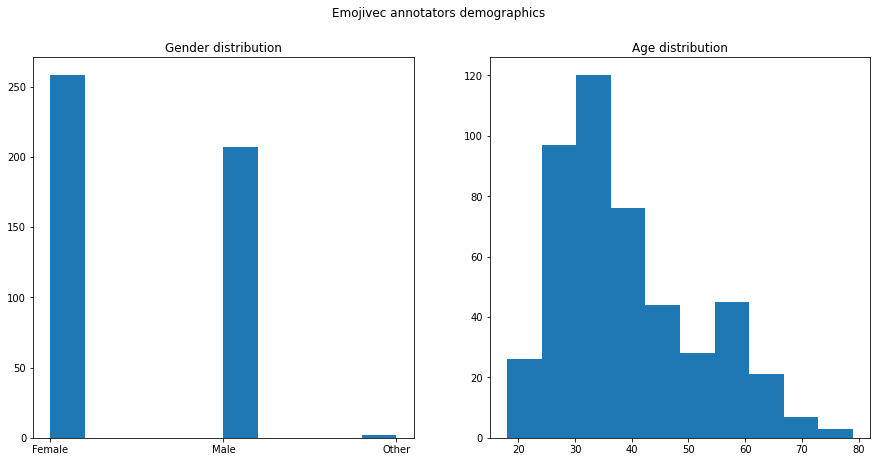

In [18]:
fig, (ax1 ,ax2) = plt.subplots(1,2)
demographics.Gender.hist(ax=ax1, grid=False).set_title("Gender distribution");
demographics.Age.hist(ax=ax2, grid=False).set_title("Age distribution");
fig.suptitle("Emojivec annotators demographics");